In [26]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation
    
    Parameters
    -----------
    X: [NumPy ndarray], shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
        
    n_components: int
        Number of principal components to return
        
    Returns
    -----------
    X_pc: [NumPy ndarray], shape = [n_samples, k_features]
        Projected dataset
    
    """
    # Calculate pairwise squared Euclidean distances
    sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    
    #Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh return them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors [projected samples]
    alphas = np.column_stack(
        (eigvecs[:, -i] for i in range(1, n_components + 1))
    )
    
    lambdas = [eigvals[-i] for i in range(1, n_components + 1)]
    
    return alphas, lambdas

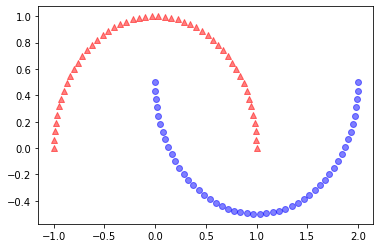

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(
    X[y==0, 0], X[y==0, 1], color='red', marker='^',
    alpha=0.5
)

plt.scatter(
    X[y==1, 0], X[y==1, 1], color='blue', marker='o',
    alpha=0.5
)
plt.show()

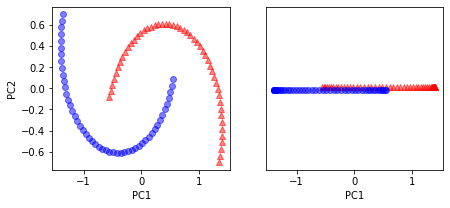

In [16]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(
    X_spca[y==0, 0], X_spca[y==0, 1], color='red',
    marker='^', alpha=0.5
)
ax[0].scatter(
    X_spca[y==1, 0], X_spca[y==1, 1], color='blue',
    marker='o', alpha=0.5
)

ax[1].scatter(
    X_spca[y==0, 0], np.zeros((50,1)) + 0.02, color='red',
    marker='^', alpha=0.5
)
ax[1].scatter(
    X_spca[y==1, 0], np.zeros((50,1)) - 0.02, color='blue',
    marker='o', alpha=0.5
)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

C:\Users\tareg\AppData\Local\Temp\ipykernel_8440\2787892349.py:33: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)
C:\Users\tareg\AppData\Local\Temp\ipykernel_8440\2787892349.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack(


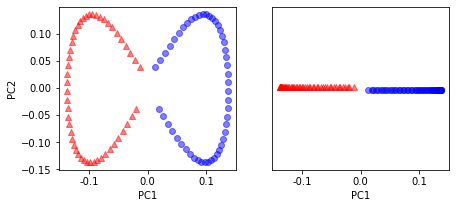

In [22]:
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(
    X_kpca[y==0, 0], X_kpca[y==0, 1], color='red',
    marker='^', alpha=0.5
)
ax[0].scatter(
    X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue',
    marker='o', alpha=0.5
)

ax[1].scatter(
    X_kpca[y==0, 0], np.zeros((50,1)) + 0.02, color='red',
    marker='^', alpha=0.5
)
ax[1].scatter(
    X_kpca[y==1, 0], np.zeros((50,1)) - 0.02, color='blue',
    marker='o', alpha=0.5
)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.show()

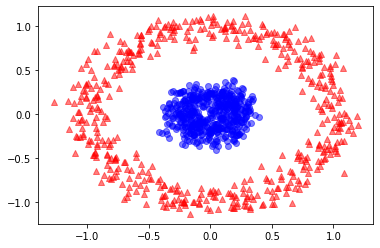

In [23]:
# Example 2 - separating concentric cirlces
from sklearn.datasets import make_circles

X, y = make_circles(
    n_samples=1000, random_state=123, noise=0.1,
    factor=0.2
)

plt.scatter(
    X[y==0, 0], X[y==0, 1], color='red', marker='^',
    alpha=0.5
)

plt.scatter(
    X[y==1, 0], X[y==1, 1], color='blue', marker='o',
    alpha=0.5
)

plt.show()

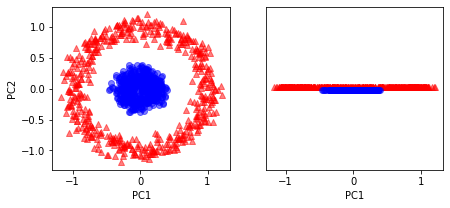

In [24]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(
    X_spca[y==0, 0], X_spca[y==0, 1], color='red',
    marker='^', alpha=0.5
)
ax[0].scatter(
    X_spca[y==1, 0], X_spca[y==1, 1], color='blue',
    marker='o', alpha=0.5
)

ax[1].scatter(
    X_spca[y==0, 0], np.zeros((500,1)) + 0.02, color='red',
    marker='^', alpha=0.5
)
ax[1].scatter(
    X_spca[y==1, 0], np.zeros((500,1)) - 0.02, color='blue',
    marker='o', alpha=0.5
)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

C:\Users\tareg\AppData\Local\Temp\ipykernel_8440\2787892349.py:33: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)
C:\Users\tareg\AppData\Local\Temp\ipykernel_8440\2787892349.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack(


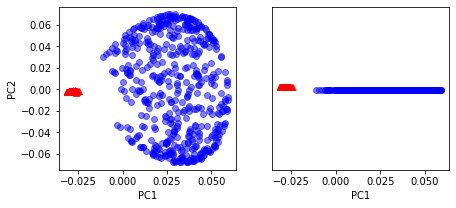

In [25]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(
    X_kpca[y==0, 0], X_kpca[y==0, 1], color='red',
    marker='^', alpha=0.5
)
ax[0].scatter(
    X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue',
    marker='o', alpha=0.5
)

ax[1].scatter(
    X_kpca[y==0, 0], np.zeros((500,1)) + 0.02, color='red',
    marker='^', alpha=0.5
)
ax[1].scatter(
    X_kpca[y==1, 0], np.zeros((500,1)) - 0.02, color='blue',
    marker='o', alpha=0.5
)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

In [27]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

C:\Users\tareg\AppData\Local\Temp\ipykernel_8440\343132618.py:33: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)
C:\Users\tareg\AppData\Local\Temp\ipykernel_8440\343132618.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  alphas = np.column_stack(


In [28]:
x_new = X[25]
x_new

array([1.8713187 , 0.00928245])

In [29]:
x_proj = alphas[25]
x_proj

array([0.07877284])

In [30]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist =  np.array(
        [np.sum( (x_new-row)**(2) ) for row in X]
    )
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)


In [31]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([0.07877284])

In [ ]:
plt.